<a href="https://colab.research.google.com/github/chayanbasu007/td_cross_sell_model/blob/main/TD_Cross_Sell_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option('display.max_column',None)

###Uploading the data csv

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


#####Ignore Warnings

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
df = pd.read_csv('train.csv',sep =';')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### 📊 Bank Client Data — Column Descriptions

####Summary
- The data is related with direct marketing campaigns of a Portuguese banking institution.
- The marketing campaigns were based on phone calls.
- Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

####Campaign Duration
**May 2008 to November 2010**

#### 💼 Client Demographics
- **age** *(numeric)*: Age of the client
- **job** *(categorical)*: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services"
- **marital** *(categorical)*: "married", "divorced", "single"
- **education** *(categorical)*: "unknown", "secondary", "primary", "tertiary"
    1.   **Primary**- basic.4y, basic.6y
    2.   **Secondary**- basic.9y, high.school, professional.course
    3.   **Tertiary** - university.degree
- **default** *(binary)*: "yes", "no"
- **balance** *(numeric)*: Average yearly balance (in euros)
- **housing** *(binary)*: "yes", "no"
- **loan** *(binary)*: "yes", "no"

#### 📞 Contact Information
- **contact** *(categorical)*: "unknown", "telephone", "cellular"
- **day** *(numeric)*: Day of last contact
- **month** *(categorical)*: "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"
- **duration** *(numeric)*: Duration of last contact (in seconds)

#### 🔁 Campaign Details
- **campaign** *(numeric)*: Number of contacts during this campaign
- **pdays** *(numeric)*: Days since last contact in a previous campaign
- **previous** *(numeric)*: Number of contacts before this campaign
- **poutcome** *(categorical)*: "unknown", "other", "failure", "success"

#### 🎯 Target Variable
- **y** *(binary)*: "yes", "no"

### Shape of the dataframe

In [5]:
df.shape

(45211, 17)

There are 45211 rows and 17 columns.
- 16 feature columns
- 1 target column

### Check for missing values

In [6]:
df.isna().sum().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Although it shows there are no missing values still some categorical columns have missing unknown categories.

### Percentage of Clients Contacted Across Job Profile

,job,count,percent,cum_count,cum_percent
0,blue-collar,9732,21.5,9732,21.5
1,management,9458,20.9,19190,42.4
2,technician,7597,16.8,26787,59.2
3,admin.,5171,11.4,31958,70.7
4,services,4154,9.2,36112,79.9
5,retired,2264,5.0,38376,84.9
6,self-employed,1579,3.5,39955,88.4
7,entrepreneur,1487,3.3,41442,91.7
8,unemployed,1303,2.9,42745,94.5
9,housemaid,1240,2.7,43985,97.3


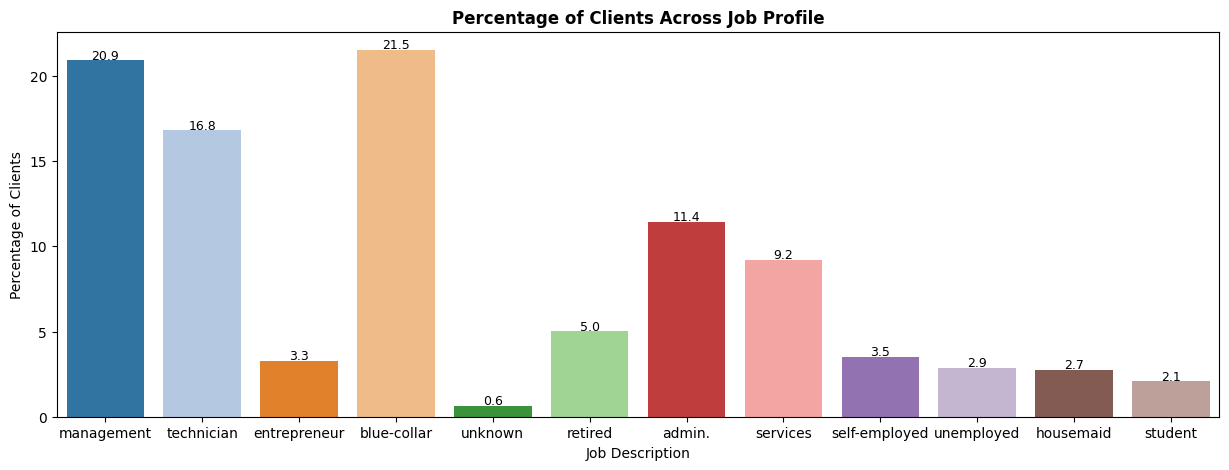

In [7]:
job_df = df['job'].value_counts().reset_index()
job_df['percent'] = ((job_df['count']/job_df['count'].sum())*100).round(1)
job_df['cum_count'] = job_df['count'].cumsum()
job_df['cum_percent'] = ((job_df['cum_count']/job_df['count'].sum())*100).round(1)
display(job_df)

#Overall Breakup
fig,axes = plt.subplots(1,1,figsize =(15,5))
sns.countplot(data=df, x='job',stat= 'percent', ax= axes, palette = 'tab20')
for bar in axes.patches:
    height = bar.get_height()
    axes.text(bar.get_x() + bar.get_width() / 2, height + 0.08,
                f'{height:.1f}', ha='center', fontsize=9)
axes.set_ylabel("Percentage of Clients")
axes.set_xlabel("Job Description")
axes.set_title("Percentage of Clients Across Job Profile", fontweight ='bold')

plt.show()

Percentage breakup of the Job Profile of the clients who were contacted by the Bank for TD during the campaign.
 - Majority of the people contacted are from Management,technician, blue-collar, administrators or in services.
 - Together these group comprise of 80% of the clients that were contacted during this marketing campaign.
 - 21.5% of clients have blue-collar jobs
 - 20.9% have management jobs
 - 16.8% are technicians
 - 11.4% are administrators and 9.2% are in services

### Percentage of Clients Contacted Across Martital Status

,marital,count
0,married,27214
1,single,12790
2,divorced,5207


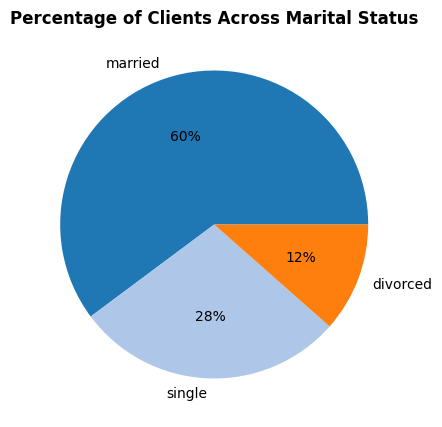

In [8]:
marital_df = df['marital'].value_counts().reset_index()
display(marital_df)

plt.figure(figsize=(5,5))
colors = sns.color_palette('tab20')
plt.pie(data = marital_df, x='count', labels =marital_df['marital'],colors= colors, autopct='%.0f%%')
plt.title("Percentage of Clients Across Marital Status", fontweight ='bold')
plt.show()

Across Marital Status,
- 60% of the clients were married
- 28% are single
- 12% are divorced

### Percentage of Clients Contacted Across Martital Status

,education,count,percent
0,unknown,1857,4.1
1,primary,6851,15.2
2,tertiary,13301,29.4
3,secondary,23202,51.3


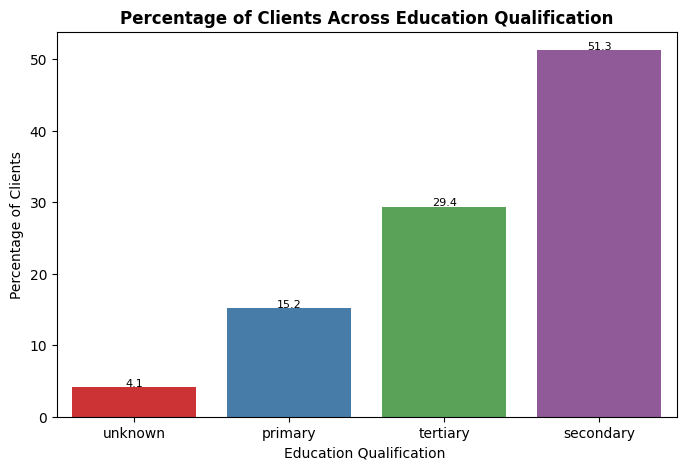

In [9]:
education_df = df['education'].value_counts().sort_values().reset_index()
education_df['percent'] = ((education_df['count']/education_df['count'].sum())*100).round(1)
display(education_df)

#Overall Breakup
fig,axes = plt.subplots(1,1,figsize =(8,5))
sns.barplot(data=education_df, x='education',y= 'percent', ax= axes, palette = 'Set1')
for bar in axes.patches:
    height = bar.get_height()
    axes.text(bar.get_x() + bar.get_width() / 2, height + 0.1,
                f'{height:.1f}', ha='center', fontsize=8)
plt.ylabel("Percentage of Clients")
plt.xlabel("Education Qualification ")
plt.title("Percentage of Clients Across Education Qualification", fontweight ='bold')
plt.show()

Across Educational Qualification,
- Highest number of clients contacted have passed secondary level of education
- Second highest number of clients contacted have passed tertiary level of education
- 15.2% clients contacted have passed primary level of education
- Education Qualification of 4.1% clients still remain unknown.





### Percentage of Clients Contacted Across Credit Defaulters

,default,count
0,no,44396
1,yes,815


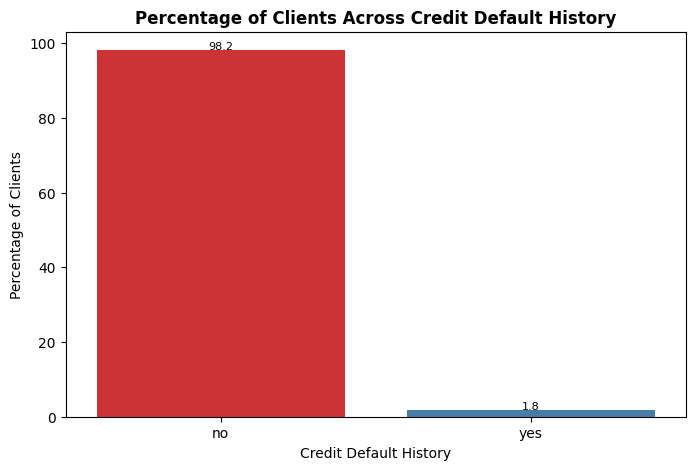

In [10]:
#Table
display(df['default'].value_counts().reset_index())

#Figure
fig,axes = plt.subplots(1,1,figsize =(8,5))
sns.countplot(data=df, x='default', stat= 'percent', ax= axes, palette = 'Set1')
for bar in axes.patches:
    height = bar.get_height()
    axes.text(bar.get_x() + bar.get_width() / 2, height + 0.1,
                f'{height:.1f}', ha='center', fontsize=8)

plt.ylabel("Percentage of Clients")
plt.xlabel("Credit Default History")
plt.title("Percentage of Clients Across Credit Default History", fontweight ='bold')
plt.show()

Only 1.8% clients contacted by the bank has a credit default history

### Percentage of Clients Contacted Across Mortgage Holders

,housing,count
0,yes,25130
1,no,20081


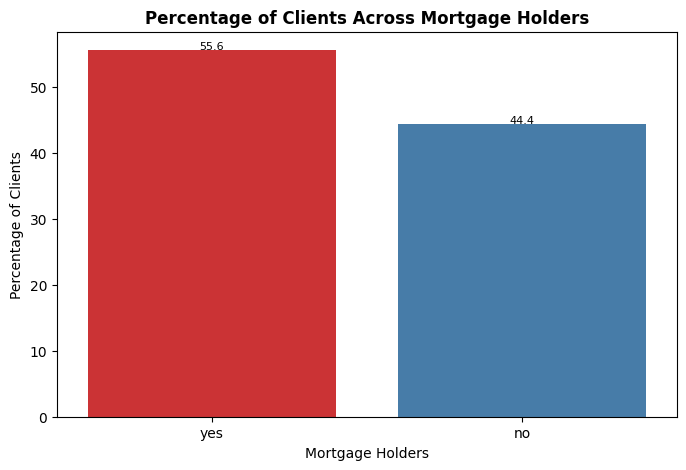

In [11]:
#Table
display(df['housing'].value_counts().reset_index())

#Figure
fig,axes = plt.subplots(1,1,figsize =(8,5))
sns.countplot(data=df, x='housing', stat= 'percent', ax= axes, palette = 'Set1')
for bar in axes.patches:
    height = bar.get_height()
    axes.text(bar.get_x() + bar.get_width() / 2, height + 0.1,
                f'{height:.1f}', ha='center', fontsize=8)

plt.ylabel("Percentage of Clients")
plt.xlabel("Mortgage Holders")
plt.title("Percentage of Clients Across Mortgage Holders", fontweight ='bold')
plt.show()


- 55.6% clients contacted by the bank have Mortgage whereas 44.4% customers don't have a mortgage.

### Percentage of Clients Contacted Across Personal Loan Holders

,loan,count
0,no,37967
1,yes,7244


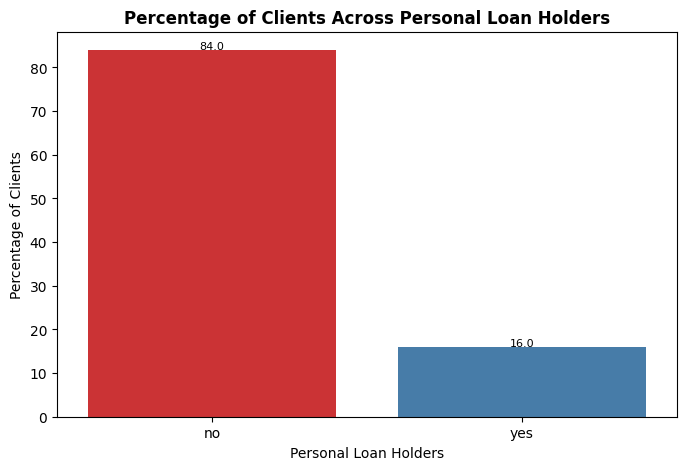

In [12]:
#Table
display(df['loan'].value_counts().reset_index())

#Figure
fig,axes = plt.subplots(1,1,figsize =(8,5))
sns.countplot(data=df, x='loan', stat= 'percent', ax= axes, palette = 'Set1')
for bar in axes.patches:
    height = bar.get_height()
    axes.text(bar.get_x() + bar.get_width() / 2, height + 0.1,
                f'{height:.1f}', ha='center', fontsize=8)

plt.ylabel("Percentage of Clients")
plt.xlabel("Personal Loan Holders")
plt.title("Percentage of Clients Across Personal Loan Holders", fontweight ='bold')
plt.show()

Only 16% of customers have a Personal Loan while the rest don't.

### Percentage of Clients Contacted With Minimum One Loan

,housing,loan,count,percent,cum_count,cum_percent
0,no,no,17204,38.1,17204,38.1
1,no,yes,2877,6.4,20081,44.4
2,yes,no,20763,45.9,40844,90.3
3,yes,yes,4367,9.7,45211,100.0


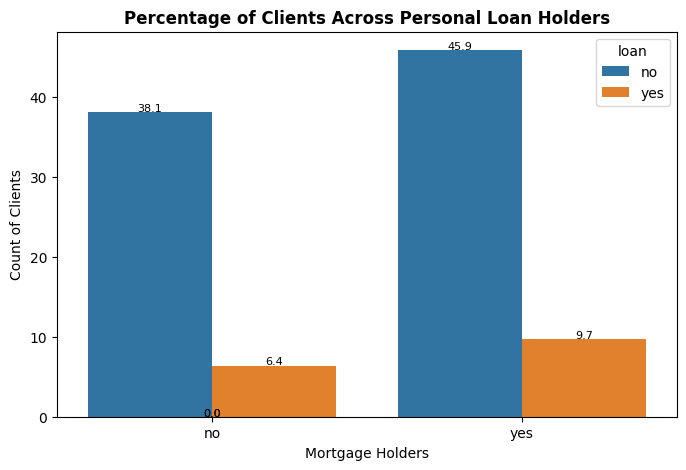

In [13]:
#Table
loan_df = df.groupby(['housing','loan']).size().reset_index()
loan_df.rename(columns= {0:'count'}, inplace= True)

loan_df['percent'] = ((loan_df['count']/loan_df['count'].sum())*100).round(1)
loan_df['cum_count'] = loan_df['count'].cumsum()
loan_df['cum_percent'] = ((loan_df['cum_count']/loan_df['count'].sum())*100).round(1)

display(loan_df)

#Figure
fig,axes = plt.subplots(1,1,figsize =(8,5))
sns.barplot(data =loan_df, x= 'housing', y='percent', hue ='loan', ax =axes)
for bar in axes.patches:
    height = bar.get_height()
    axes.text(bar.get_x() + bar.get_width() / 2, height + 0.1,
                f'{height:.1f}', ha='center', fontsize=8)

plt.ylabel("Count of Clients")
plt.xlabel("Mortgage Holders")
plt.title("Percentage of Clients Across Personal Loan Holders", fontweight ='bold')
plt.show()

- 38.1% clients do not hold any kind of loan.
- Rest 61.9% clients hold atleast one kind of loan (either HL or PL or both).
- 6.4% clients hold only Personal Loans
- 45.9% clients hold only Mortgages
- 9.7% clients hold both Mortgage and Personal Loans

### Percentage of Clients Contacted across Mode of Contact

,contact,count
0,cellular,29285
1,unknown,13020
2,telephone,2906


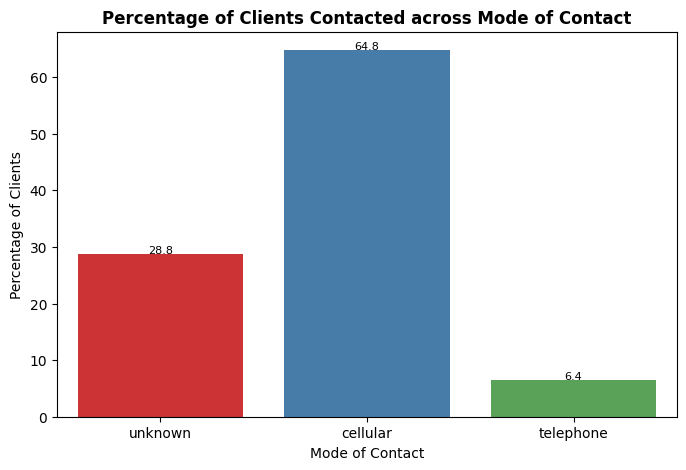

In [14]:
#Table
display(df['contact'].value_counts().reset_index())

#Figure
fig,axes = plt.subplots(1,1,figsize =(8,5))
sns.countplot(data=df, x='contact', stat= 'percent', ax= axes, palette = 'Set1')
for bar in axes.patches:
    height = bar.get_height()
    axes.text(bar.get_x() + bar.get_width() / 2, height + 0.1,
                f'{height:.1f}', ha='center', fontsize=8)

plt.ylabel("Percentage of Clients")
plt.xlabel("Mode of Contact")
plt.title("Percentage of Clients Contacted across Mode of Contact", fontweight ='bold')
plt.show()

- 64.8% clients were contacted by device where as 6.4% clients were contacted by Telephone.
- Mode of Contact remains unknown for 28.8% clients.

### Percentage of Clients Contacted across Months

,month,count,percent
0,may,13766,30.4
1,jul,6895,15.3
2,aug,6247,13.8
3,jun,5341,11.8
4,nov,3970,8.8
5,apr,2932,6.5
6,feb,2649,5.9
7,jan,1403,3.1
8,oct,738,1.6
9,sep,579,1.3


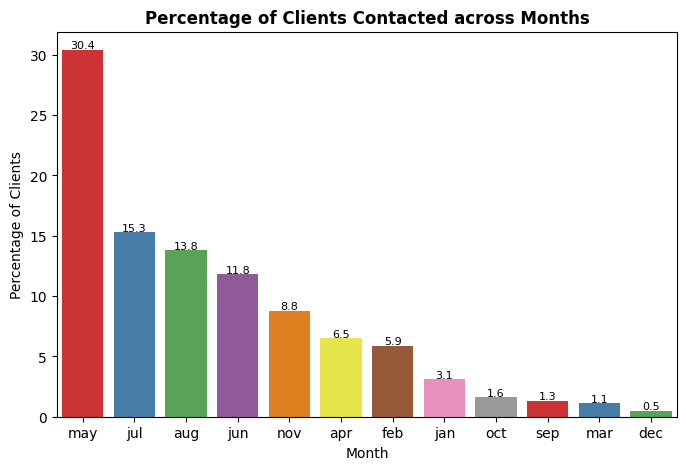

In [15]:
#Table
month_df = df['month'].value_counts().reset_index()
month_df.sort_values(by='count', ascending = False)
month_df['percent'] = ((month_df['count']/month_df['count'].sum())*100).round(1)
display(month_df)

#Figure
fig,axes = plt.subplots(1,1,figsize =(8,5))
sns.barplot(data=month_df, x='month', y= 'percent', ax= axes, palette = 'Set1')
for bar in axes.patches:
    height = bar.get_height()
    axes.text(bar.get_x() + bar.get_width() / 2, height + 0.1,
                f'{height:.1f}', ha='center', fontsize=8)

plt.ylabel("Percentage of Clients")
plt.xlabel("Month")
plt.title("Percentage of Clients Contacted across Months", fontweight ='bold')
plt.show()

Majority of the clients were contacted in mid year.
- 30.4% clients were contacted in May.
- 15.3% clients were contacted in Jul.
- 13.8% clients were contacted in Aug.
- 11.8% clients were contacted in Jun.
- 8.8% clients were contacted in Nov.

Lowest percentage of clients contacted were in Dec which is around 0.5%.


###Adding Quarters to the Dataframe

In [16]:
conditions = [(df['month']=='jan') | (df['month']=='feb') | (df['month']=='mar'),
              (df['month']=='apr') | (df['month']=='may') | (df['month']=='jun'),
              (df['month']=='jul') | (df['month']=='aug') | (df['month']=='sep'),
              (df['month']=='oct') | (df['month']=='nov') | (df['month']=='dec')
              ]
categories =['Q1','Q2','Q3','Q4']

df['quarter'] = np.select(conditions, categories, default ='unknown')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,quarter
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Q2
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Q2
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Q2
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Q2
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Q2


,count
quarter,
Q2,22039
Q3,13721
Q4,4922
Q1,4529


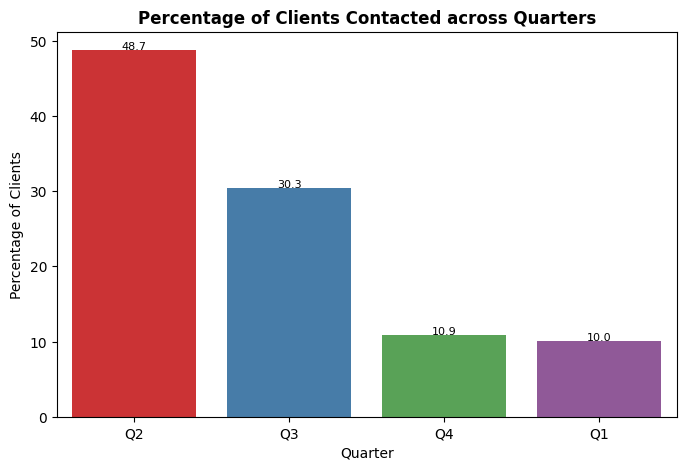

In [17]:
#Table
display(df['quarter'].value_counts().reset_index())

#Figure
fig,axes = plt.subplots(1,1,figsize =(8,5))
sns.countplot(data=df, x='quarter', stat= 'percent', ax= axes, palette = 'Set1')
for bar in axes.patches:
    height = bar.get_height()
    axes.text(bar.get_x() + bar.get_width() / 2, height + 0.1,
                f'{height:.1f}', ha='center', fontsize=8)

plt.ylabel("Percentage of Clients")
plt.xlabel("Quarter")
plt.title("Percentage of Clients Contacted across Quarters", fontweight ='bold')
plt.show()

Across Quarters,
- 48.7% clients were contacted in Q2.
- 30.3% clients were contacted in Q3
- Only 20% of the clients were contacted in Q1 and Q4 i.e. towards the beginning and end of the year.


Together these comprise of ~80% of the overall clients that were contacted.

###Percentage of Client Outcome Across Previous Campaign

,count
poutcome,
unknown,36959
failure,4901
other,1840
success,1511


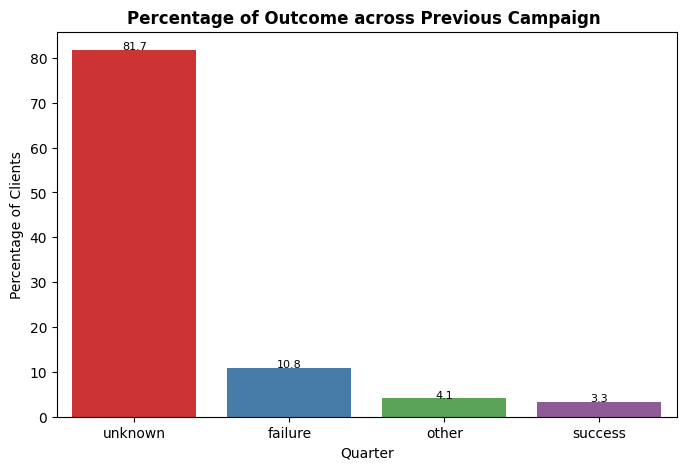

In [31]:
#Table
display(df['poutcome'].value_counts().reset_index())

#Figure
fig,axes = plt.subplots(1,1,figsize =(8,5))
sns.countplot(data=df, x='poutcome', stat= 'percent', ax= axes, palette = 'Set1')
for bar in axes.patches:
    height = bar.get_height()
    axes.text(bar.get_x() + bar.get_width() / 2, height + 0.1,
                f'{height:.1f}', ha='center', fontsize=8)

plt.ylabel("Percentage of Clients")
plt.xlabel("Quarter")
plt.title("Percentage of Client Outcome across Previous Campaign ", fontweight ='bold')
plt.show()

###Variable Seperation

In [27]:
categorical_cols =[]
continuous_cols =[]

for i in df.columns:
  if df[i].dtype =='O' and i!= 'y':
    categorical_cols.append(i)
  if df[i].dtype !='O' and i!= 'y':
    continuous_cols.append(i)

print(categorical_cols)
print(continuous_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'quarter']
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


###Overall Conversion Rate from Targetted Telephone Campaign

,y,count
0,no,39922
1,yes,5289


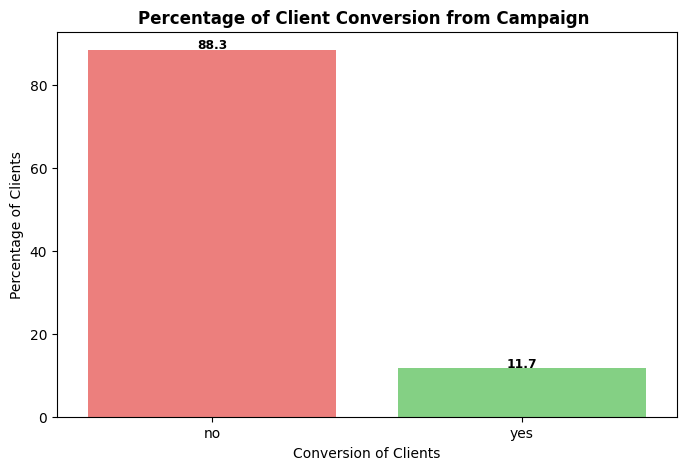

In [87]:
#Table
display(df['y'].value_counts().reset_index())

#Figure
fig,axes = plt.subplots(1,1,figsize =(8,5))
custom_palette = {'no': '#FF6D6A', 'yes': '#77dd77'}
sns.countplot(data=df, x='y', stat= 'percent', ax= axes, palette = custom_palette)
for bar in axes.patches:
    height = bar.get_height()
    axes.text(bar.get_x() + bar.get_width() / 2, height + 0.3,
                f'{height:.1f}', ha='center', fontsize=8.8,fontweight ='bold')

plt.ylabel("Percentage of Clients")
plt.xlabel("Conversion of Clients")
plt.title("Percentage of Client Conversion from Campaign ", fontweight ='bold')
plt.show()


#### 🎯 Conversion Breakdown
- ✅ **Converted**: 11.7%
- ❌ **Not Converted**: 88.3%

> Clients who converted from the campaign are significantly outnumbered by those who didn’t.

---

#### 🔍 Key Insights

##### ⚠️ **High Drop-off Rate**
- A staggering **88.3%** of clients chose not to convert.
- This highlights a critical **bottleneck** in the campaign funnel—either in targeting, messaging, or offer attractiveness.

##### 🌱 **Growth Opportunity**
- Even though conversion is low, the **11.7%** who did convert present a **valuable engaged segment**.
- Understanding what worked for this group could help replicate success elsewhere.

##### 📉 **Effectiveness Concerns**
- The current strategy may lack resonance with most clients.
- It could be underperforming due to unclear value propositions or **misaligned targeting**.

#### 📌 Final Thought
The campaign’s low conversion rate isn’t a failure—it’s a **signal**.

###Percentage of Client Conversion

Text(0.5, 0.92, 'Client Conversion across Dimensions')

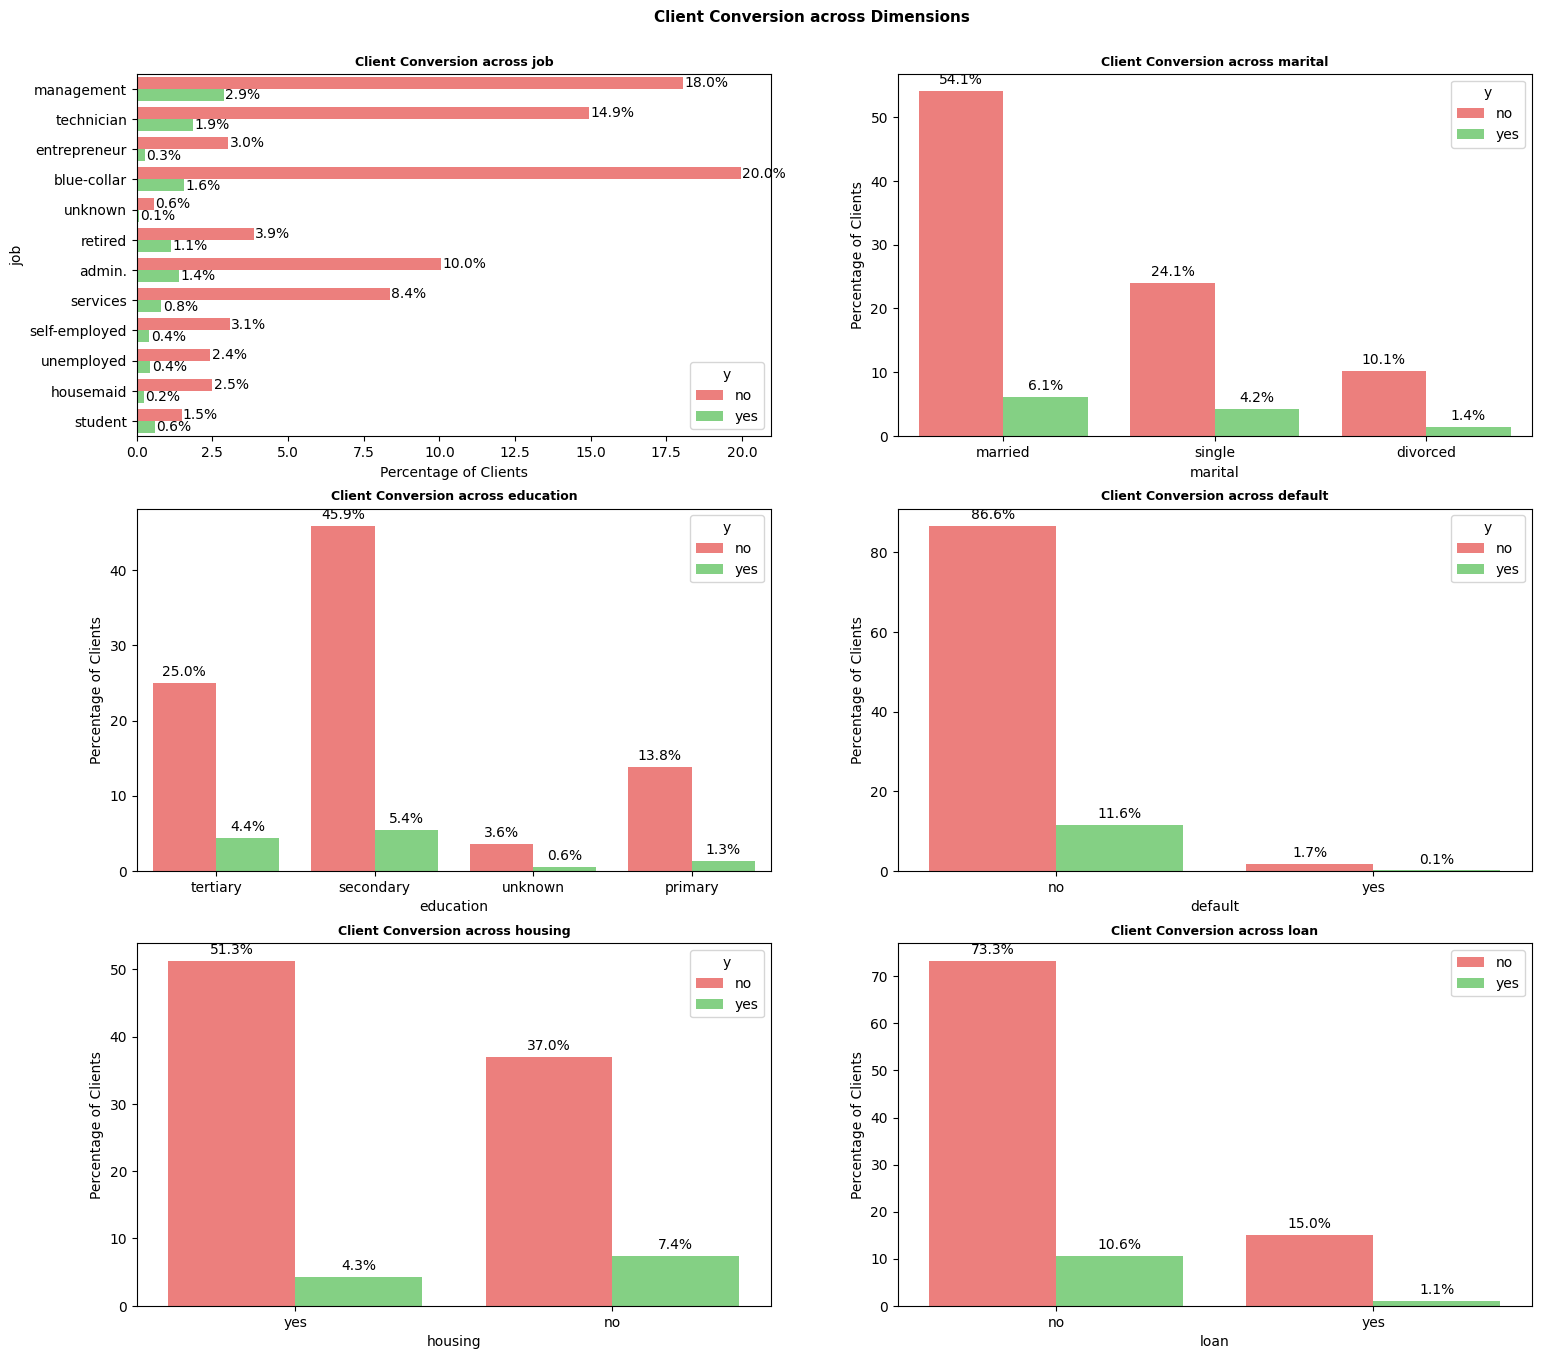

In [88]:
fig,axes = plt.subplots(3,2,figsize=(18,16))
axes = axes.flatten()
k=0
custom_palette = {'no': '#FF6D6A', 'yes': '#77dd77'}
for i in categorical_cols[:6]:
  if i == 'job':
    sns.countplot(data =df, y=i, hue ='y',stat ='percent', ax= axes[k], palette = custom_palette)
    for container in axes[k].containers:
        axes[k].bar_label(container, fmt='%.1f%%', label_type='edge', padding=1)
    axes[k].set_ylabel(f"{i}")
    axes[k].set_xlabel("Percentage of Clients")
    axes[k].set_title(f"Client Conversion across {i}", fontweight ='bold', fontsize = 9)

  else:
    sns.countplot(data =df, x=i, hue ='y',stat ='percent', ax= axes[k], palette = custom_palette)
    for container in axes[k].containers:
      axes[k].bar_label(container, fmt='%.1f%%', label_type='edge', padding=3)
    axes[k].set_ylabel("Percentage of Clients")
    axes[k].set_xlabel(f"{i}")
    axes[k].set_title(f"Client Conversion across {i}", fontweight ='bold', fontsize = 9)
  k+=1
plt.legend(loc = 'upper right',bbox_to_anchor=(1,1))
plt.suptitle('Client Conversion across Dimensions',fontweight ='bold',
             fontsize =11,y=0.92, x=0.5,ha ='center', va ='top')

Text(0.5, 0.91, 'Client Conversion across Dimensions')

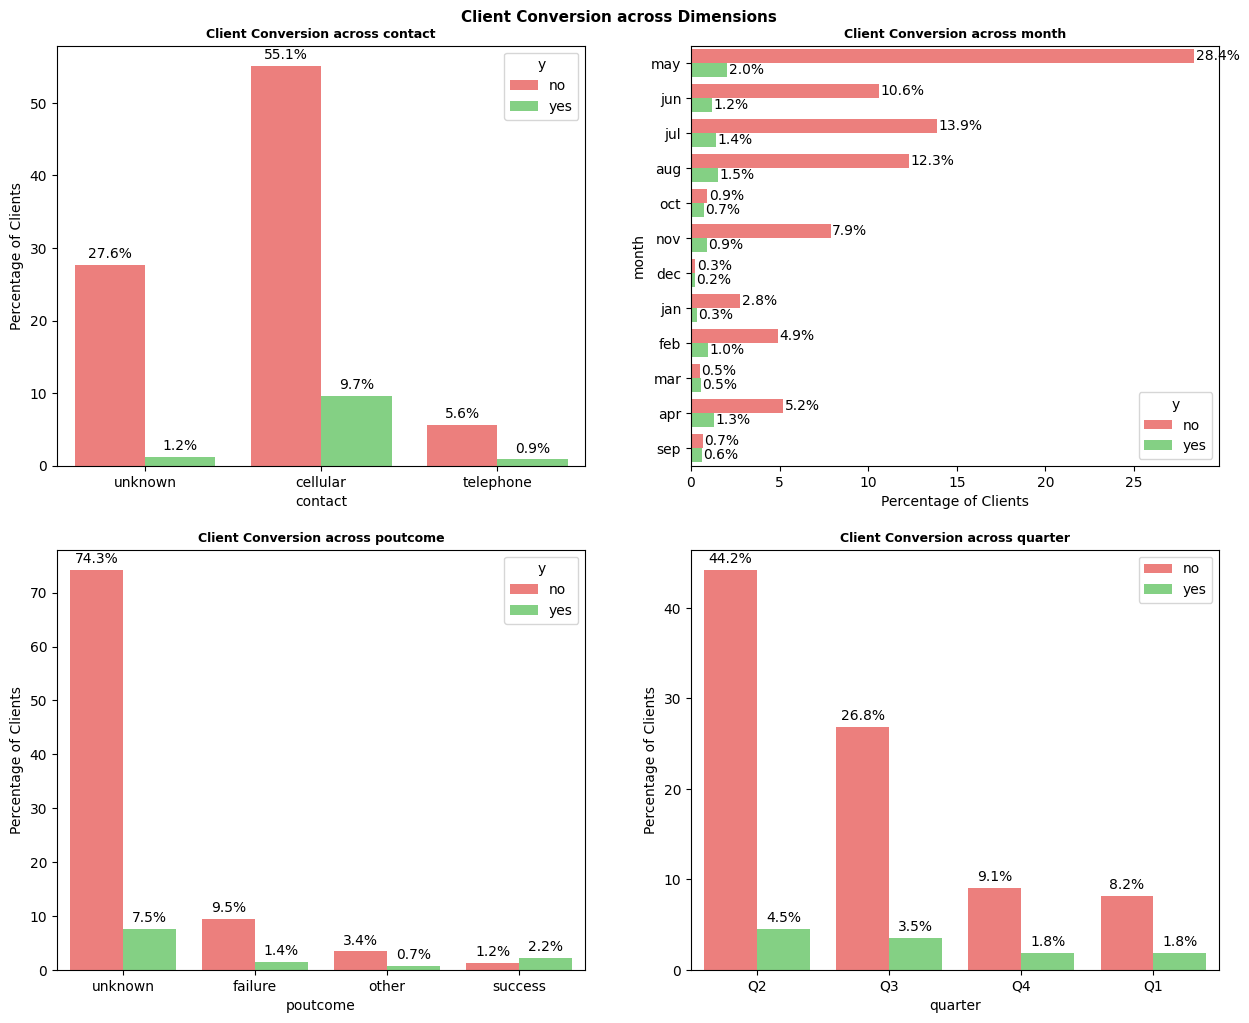

In [90]:
fig,axes = plt.subplots(2,2,figsize=(15,12))
axes = axes.flatten()
k=0
custom_palette = {'no': '#FF6D6A', 'yes': '#77dd77'}
for i in categorical_cols[6:]:
  if i == 'month':
    sns.countplot(data =df, y=i, hue ='y',stat ='percent', ax= axes[k], palette = custom_palette)
    for container in axes[k].containers:
        axes[k].bar_label(container, fmt='%.1f%%', label_type='edge', padding=1)
    axes[k].set_ylabel(f"{i}")
    axes[k].set_xlabel("Percentage of Clients")
    axes[k].set_title(f"Client Conversion across {i}", fontweight ='bold', fontsize = 9)

  else:
    sns.countplot(data =df, x=i, hue ='y',stat ='percent', ax= axes[k], palette = custom_palette)
    for container in axes[k].containers:
      axes[k].bar_label(container, fmt='%.1f%%', label_type='edge', padding=3)
    axes[k].set_ylabel("Percentage of Clients")
    axes[k].set_xlabel(f"{i}")
    axes[k].set_title(f"Client Conversion across {i}", fontweight ='bold', fontsize = 9)
  k+=1
plt.legend(loc = 'upper right',bbox_to_anchor=(1,1))
plt.suptitle('Client Conversion across Dimensions',fontweight ='bold',
             fontsize =11,y=0.91, x=0.5,ha ='center', va ='top')

#### 🧩 Campaign Performance Insights across Demographics

##### 📌 Problem Statement
Analyze client conversion behavior across key demographics to refine future campaign targeting, enhance response rates, and prioritize segments with high engagement potential.

---

##### 📊 Conversion Analysis Summary

The image presents grouped bar charts across six dimensions—job, marital status, education, default history, housing loan status, and personal loan status. Each chart shows the percentage of clients who did **not convert** (red) versus those who **converted** (green).

---

##### 👷 Conversion by Job Type
| Job Category   | Converted % | Key Insight |
|----------------|-------------|-------------|
| Management     | 2.9%        | 📋 Strong potential in higher-income groups. |
| Retired        | 1.4%        | 🧓 Opportunity in pensioners and financial security. |
| Technician     | 1.9%        | 🛠️ Good traction from skilled professionals. |
| Blue-collar    | 1.6%        | 🔧 Engaged despite economic constraints. |
| Student        | 0.1%        | 🎓 Very low uptake—targeting may not be viable. |

> 🛎️ **Focus on job types with economic stability and past success indicators.**

---

##### 💍 Conversion by Marital Status
| Status  | Converted % | Insight |
|---------|--------------|---------|
| Married | 6.1%        | 👨‍👩‍👧‍👦 Most conversions, but also highest client base. |
| Single  | 4.2%        | ❤️ Higher relative engagement rate. |
| Divorced| 1.4%        | 💔 Low conversion—requires different messaging.

> ✨ **Target singles for higher response likelihood.**

---

##### 🎓 Conversion by Education
| Education Level | Converted % | Insight |
|------------------|-------------|---------|
| Secondary        | 5.4%        | 📘 Most effective—likely practical decision-makers. |
| Tertiary         | 4.4%        | 🧠 Slightly lower—may need value-focused messaging. |
| Primary          | 1.3%        | 📗 Low conversions—less financial agility.

> 📚 **Align messaging style to education tiers.**

---

##### 💳 Conversion by Default History
| Default Status | Converted % | Insight |
|----------------|-------------|---------|
| No             | 11.6%       | ✅ Default-free clients are significantly more receptive. |
| Yes            | 0.1%        | 🚫 Almost no conversions—credit risk barrier.

> ⚠️ **Consider excluding or segmenting defaulted clients.**

---

##### 🏠 Conversion by Housing Loan
| Housing Loan | Converted % | Insight |
|--------------|-------------|---------|
| No           | 7.4%        | 🔓 More financially flexible, better conversion. |
| Yes          | 4.3%        | 🔒 Lower engagement—likely tied to obligations.

> 🏡 **Target non-loan clients for higher campaign ROI.**

---

##### 💼 Conversion by Personal Loan
| Personal Loan | Converted % | Insight |
|----------------|-------------|--------|
| No             | 10.6%       | 🟢 Responsive—less financial strain. |
| Yes            | 1.1%        | 🔴 Minimal conversion—likely burdened.

> 💰 **Loan status is a strong predictor of campaign response.**

---

##### ☎️ Conversion by Contact Method
| Contact Type | Converted % | Key Insight |
|--------------|--------------|--------------|
| Cellular     | 9.7%         | 📱 Highest engagement—mobile outreach is most effective. |
| Telephone    | 0.9%         | ☎️ Low conversions—traditional calls less impactful. |
| Unknown      | 1.2%         | ❓ High "No" responses—data may be unreliable or misclassified. |

> 🔍 **Recommendation**: Prioritize cellular outreach and audit "unknown" contact metadata.

---

##### 📅 Conversion by Month
| Month     | Converted % | Key Insight |
|-----------|-------------|--------------|
| March     | 1.3%        | 🌱 Solid start to campaign season—good traction. |
| April     | 0.7%        | 🌤️ Moderate conversions—worth considering for mid-quarter push. |
| May       | High Volume, Low Rate | ⚠️ Popular month, but low yield. |
| August    | 1.5%        | ☀️ Highest conversion—peak month for targeting. |
| November  | Minimal     | ❄️ End-of-year fatigue—poor responsiveness. |
| December  | Minimal     | 🎄 Holiday slump—avoid campaigns. |

> 🗓️ **Recommendation**: Focus on Q2 and August for optimal engagement.

---

##### 🔄 Conversion by Previous Outcome
| Outcome   | Converted % | Key Insight |
|-----------|-------------|--------------|
| Success   | 2.2%        | ✅ Strong predictor of future conversions. |
| Unknown   | 7.5%        | 🤷 Mixed outcomes—opportunity in ambiguity. |
| Failure   | Low         | 🔴 Poor conversions—requires better targeting. |

> 💡 **Recommendation**: Retarget based on prior campaign success and investigate unknowns.

---

##### 🕒 Conversion by Quarter
| Quarter | Converted % | Key Insight |
|---------|-------------|--------------|
| Q1      | 1.8%        | 🌅 Modest engagement—warm-up phase. |
| Q2      | 4.5%        | 🌞 Peak performance—launch major campaigns here. |
| Q3      | 3.5%        | 🍂 Good follow-through—sustain momentum. |
| Q4      | 1.8%        | ❄️ Low response—budget fatigue and distractions.

> 📆 **Recommendation**: Align high-investment campaigns with Q2 and Q3 cycles.

---

##### 🎯 Strategic Recommendations
- 🧠 Segment by **default status**, **loan history**, and **job type** to focus on conversion-ready groups.
- 🗣️ Personalize outreach for **singles** and **secondary-educated** clients.
- 🔍 Reframe messaging for high-potential segments like management and technicians.
- 🧪 Consider score-based targeting to exclude financially restricted profiles.
- 📆 Align high-investment campaigns with Q2 and Q3 cycles.
